In [135]:
import cirq
from cirq.contrib.svg import SVGCircuit
import numpy as np
from imp import reload
from LQG import tetrahedra as tet
import LQG
reload(LQG.tetrahedra)

<module 'LQG.tetrahedra' from '/home/espresso/SynologyDrive/edu-resources/quantum-programming/csci-581-lqg/LQG/tetrahedra.py'>

# Quantum Tetrahedron State Preparation

In [133]:
def tetra_0s(qubits):
    ''' make the |0L> circuit 
    '''
    if len(qubits) != 4:
        print('error, tried to make tetrahadron without n=4 qubits')
        exit(1)
    yield cirq.X.on_each(qubits)
    yield cirq.H.on_each(qubits[::2])
    yield cirq.CNOT(qubits[0],qubits[1])
    yield cirq.CNOT(qubits[2],qubits[3])
    
def cnots(qubit_pairs):
    ''' take a list of pairs of qubits, CNOT each individual list
    '''
    for pair in qubit_pairs:
        yield cirq.CNOT(pair[0],pair[1])
        
def end_vec(circuit):
    ''' get predicted end state of a circuit
    '''
    sim = cirq.Simulator()
    end = sim.simulate(circuit)
    return end
    


In [139]:
qubits = cirq.LineQubit.range(8)
bit_flip = cirq.bit_flip(p=.1)

'''test the monopole amplitude
'''
circuit = cirq.Circuit( [cirq.H(qubits[0]),
                         cirq.H(qubits[1]),
                         cirq.CNOT(qubits[1],qubits[2])**-1,
                         cirq.X(qubits[2]),
                         cnots([(qubits[0],qubits[1]),
                                (qubits[2],qubits[3]),
                                (qubits[1],qubits[2]),
                                (qubits[0],qubits[3])]),
                         bit_flip.on_each(qubits[:4])])

circuit.append([cirq.H.on_each(qubits[:2]), cirq.X.on_each(qubits[:4])])
end = end_vec(circuit).final_state_vector
target = tet.L_zero
print('Test monopole |0L>, should be ~0.25: ', np.abs(np.dot(target,end))**2)


''' test the state preparation
'''
circuit = cirq.Circuit(tetra_0s(qubits[:4]), tetra_0s(qubits[4:]))
end = end_vec(circuit).final_state_vector
target = np.kron(tet.L_zero,sp.L_zero)
print('Test |0L> state prep, should be ~1: ',np.dot(end, target))

## test the interaction
#circuit = cirq.Circuit(tetra_0s(qubits[:4]), tetra_0s(qubits[4:]))
#circuit.append(cnots([(qubits[i],qubits[i+4]) for i in range(0,4)]))
#circuit.append([cirq.H.on_each(qubits[:4]),cirq.X.on_each(qubits)])
#end = end_vec(circuit).final_state_vector
#print('should be -0.0625: ',np.dot(end,target))

Test monopole |0L>, should be ~0.25:  0.24999994039535878
Test |0L> state prep, should be ~1:  (0.9999998807907104+0j)
should be -0.0625:  0j


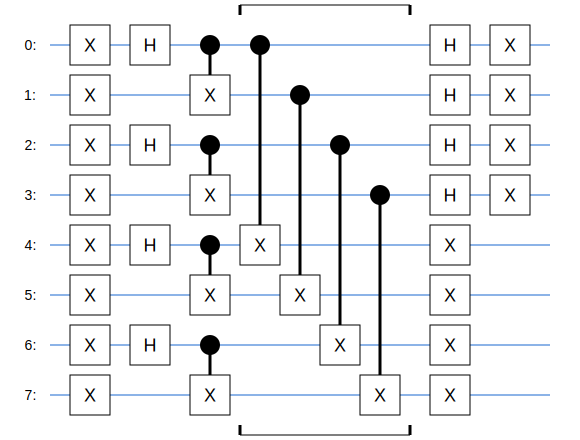

In [70]:
SVGCircuit(circuit)